In [1]:
import pandas as pd
import numpy as np
from functools import reduce
import seaborn as sns
import matplotlib.pyplot as plt
import matplotlib.pylab as pylab

# exploring dataframe
pd.read_csv(r'C:\Users\Len\Documents\GitHub\solo_502\course-project-solo_502\data\raw\ClimateData_Whistler.csv')

,Lat,long,elev,period,MAT,MWMT,MCMT,TD,MAP,MSP,...,RH(03),RH(04),RH(05),RH(06),RH(07),RH(08),RH(09),RH(10),RH(11),RH(12)
0,50.1038,-122.9136,1480,year_1901,2.4,12.3,-6.2,18.5,1557,356,...,68,67,63,64,65,60,66,69,76,75
1,50.1038,-122.9136,1480,year_1902,1.8,10.6,-5.9,16.6,1649,335,...,70,66,65,58,65,61,62,67,73,75
2,50.1038,-122.9136,1480,year_1903,1.7,10.4,-4.4,14.8,1565,601,...,59,67,62,61,69,70,75,67,70,74
3,50.1038,-122.9136,1480,year_1904,2.4,11.1,-4.6,15.8,1448,269,...,68,62,61,58,60,57,61,71,70,77
4,50.1038,-122.9136,1480,year_1905,2.2,11.9,-4.9,16.9,1268,485,...,69,59,58,60,60,65,72,66,67,76
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
114,50.1038,-122.9136,1480,year_2015,4.3,12.3,-3.5,15.8,1298,330,...,78,73,62,61,71,72,78,78,78,83
115,50.1038,-122.9136,1480,year_2016,3.6,12.1,-6.6,18.8,1589,328,...,78,70,66,69,77,72,77,85,87,87
116,50.1038,-122.9136,1480,year_2017,3.0,13.4,-4.9,18.3,1405,174,...,84,78,66,66,69,69,74,78,85,86
117,50.1038,-122.9136,1480,year_2018,3.4,12.6,-3.5,16.2,1472,347,...,77,74,64,72,68,73,80,73,82,89


In [25]:
# method chaining and creating a function for all my datasets with the same format
def load_and_process(path_to_csv_file):
    
    ##monthaly variables
    # load data and select variables of interest
    dataframe = (
                pd.read_csv(path_to_csv_file)
                .iloc[:,83:251]
    )
    
    # Create dataframe with labelled years
    annual_m = np.arange(1901, 2020, 1).repeat(12)
    annual_m2 = np.vstack(annual_m)
    years_m = pd.DataFrame(data = annual_m2)
    
    # Create list of Strings for each month
    months = [('Jan','Feb', 'Mar', 'Apr', 'May', 'Jun', 'Jul', 'Aug', 'Sep', 'Oct', 'Nov', 'Dec')*119]
    months2 = (
        pd.DataFrame(months)
        .melt()
    )
    

    # Transpose and then melt monthly observations in Dataframe to get 
    # individual variables in separate columns and the months as observations instead of variables
    global monthly_data
    monthly_data = [months2, years_m]
    for i in range(14):
        monthly_data.append(dataframe.iloc[:,i*12:(i+1)*12].T.melt())
    
    # Cleaning dataframe
    monthly_data = (
                    pd.concat(monthly_data, axis = 1)
                    .drop(columns = 'variable')
    )
    
    # Label columns (variables)
    monthly_data.columns = ['Month','Year','Max Temp', 'Min Temp', 'Ave Temp', 'Precipitation', 'Radiation', 'DDays < 0°C', 'DDays > 5°C', 
                            'DDays < 18°C', 'DDays > 18°C', 'Frost Free Days', 'Snowfall', 'Evaporation', 
                            'Moisture Deficit', 'Relative Humidity']
    
#     return monthly_data

    ## seasonal variables 
    # winter variables
    dataframe_s = (
                pd.read_csv(path_to_csv_file)
                .iloc[:,[27,31,35,39,47,51,55,59,63,67,71,75,79]]
    )
    
    # label years, fit together with rest of the dataframe
    annual_w = np.arange(1901, 2020, 1)
    annual_w2 = np.vstack(annual_w)
    years_s = pd.DataFrame(data = annual_w2)
    seasons = [years_s, dataframe_s]
    global seasonal_data
    seasonal_data = pd.concat(seasons, axis = 1)
    
    # label columns (variables)
    seasonal_data.columns = ['Year','Max Temp', 'Min Temp', 'Ave Temp', 'Precipitation', 'DDays < 0°C', 'DDays > 5°C', 
                            'DDays < 18°C', 'DDays > 18°C', 'Frost Free Days', 'Snowfall', 'Evaporation', 
                            'Moisture Deficit', 'Relative Humidity']
    
#     return seasonal_data

    ## annual variables
    dataframe_a = (
                pd.read_csv(path_to_csv_file)
                .iloc[:,4:27]
    )
    years = [years_s, dataframe_a]
    global yearly_data
    yearly_data = pd.concat(years, axis = 1)
    
    # label columns (variables)
    yearly_data.columns = ['Year','Ave Temp','Warmest Month', 'Coldest Month','Difference', 'Mean Precip','May-Sep Precip','Heat-Moist I', 
                           'Summer Heat-Moist I', 'DDays < 0°C', 'DDays > 5°C', 'DDays < 18°C', 'DDays > 18°C', 
                           'Frost Free Days','Begin FFP','End FFP','Frost Free Period', 'Snowfall', 'Min Temp (30)', 'Max Temp (30)', 'Radiation',
                           'Evaporation', 'Moisture Deficit', 'Relative Humidity']
    
    print(yearly_data)
    
load_and_process(r'C:\Users\Len\Documents\GitHub\solo_502\course-project-solo_502\data\raw\ClimateData_Whistler.csv')
# load_and_process()
# print(load_and_process['seasonal_data'])

monthly_data.to_csv(r'C:\Users\Len\Documents\GitHub\solo_502\course-project-solo_502\data\processed\ClimateData_Whistler_months.csv', index=False)
seasonal_data.to_csv(r'C:\Users\Len\Documents\GitHub\solo_502\course-project-solo_502\data\processed\ClimateData_Whistler_seasons.csv', index=False)
yearly_data.to_csv(r'C:\Users\Len\Documents\GitHub\solo_502\course-project-solo_502\data\processed\ClimateData_Whistler_years.csv', index=False)


     Year  Ave Temp  Warmest Month  Coldest Month  Difference  Mean Precip  \
0    1901       2.4           12.3           -6.2        18.5         1557   
1    1902       1.8           10.6           -5.9        16.6         1649   
2    1903       1.7           10.4           -4.4        14.8         1565   
3    1904       2.4           11.1           -4.6        15.8         1448   
4    1905       2.2           11.9           -4.9        16.9         1268   
..    ...       ...            ...            ...         ...          ...   
114  2015       4.3           12.3           -3.5        15.8         1298   
115  2016       3.6           12.1           -6.6        18.8         1589   
116  2017       3.0           13.4           -4.9        18.3         1405   
117  2018       3.4           12.6           -3.5        16.2         1472   
118  2019       3.2           11.9           -2.7        14.6         1016   

     May-Sep Precip  Heat-Moist I  Summer Heat-Moist I  DDays <

<AxesSubplot:xlabel='Month', ylabel='Snowfall'>

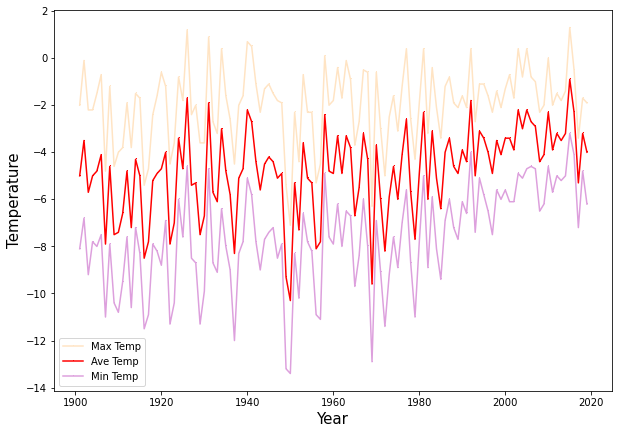

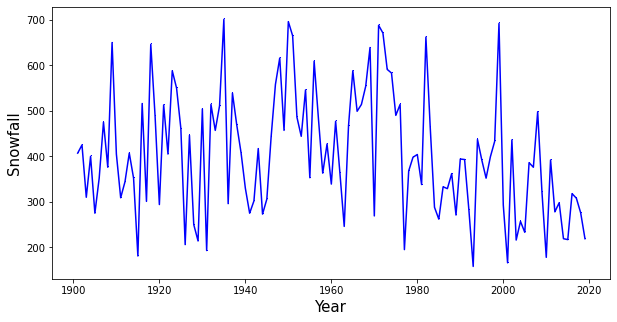

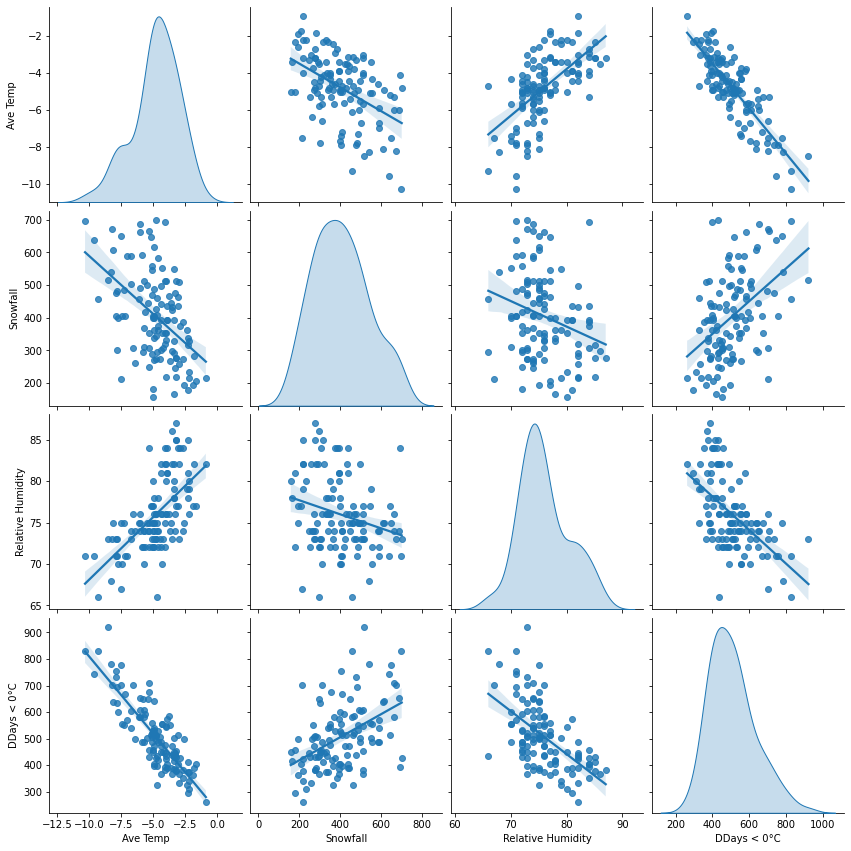

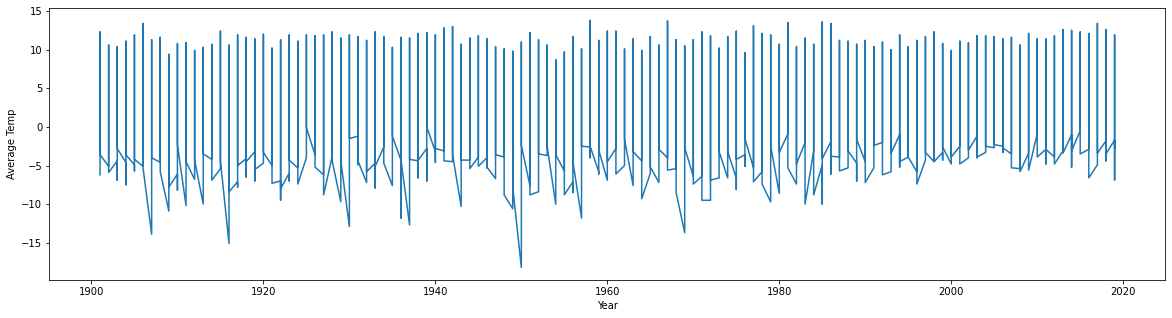

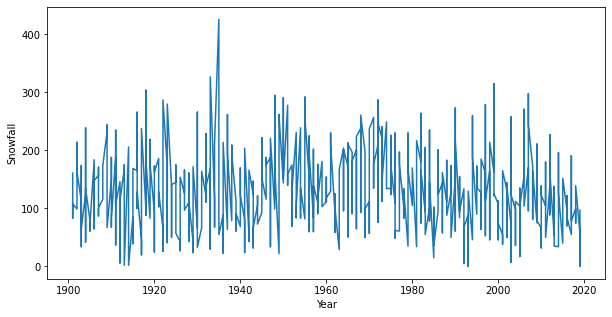

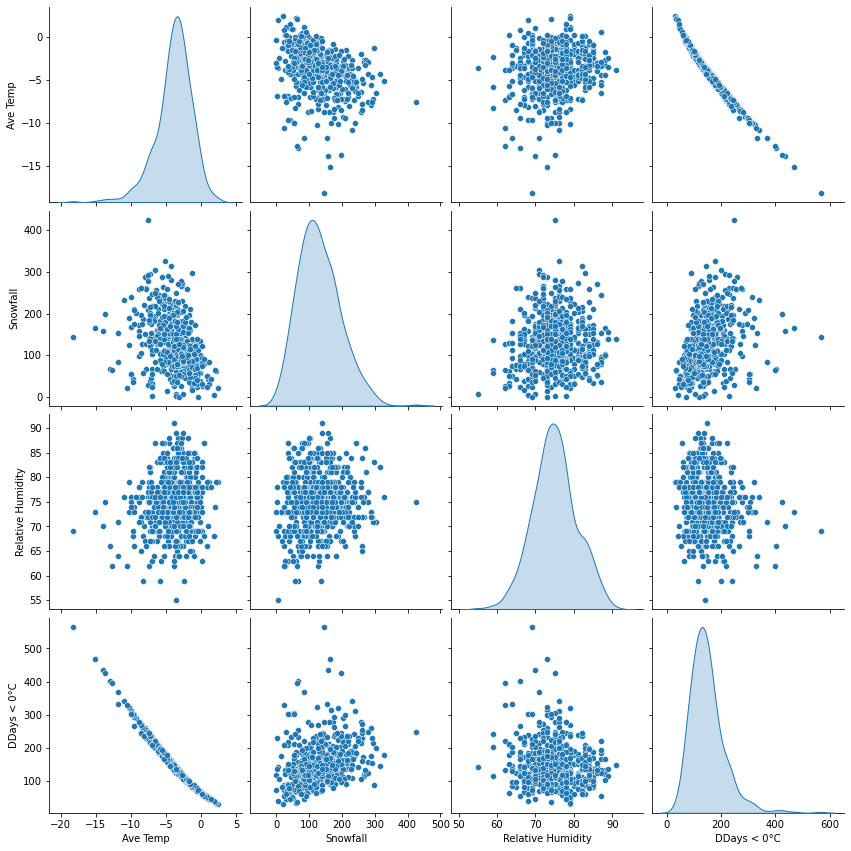

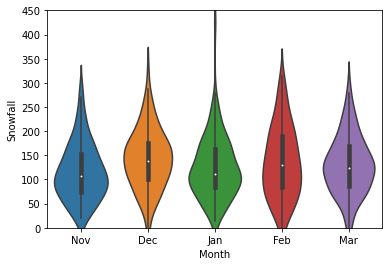

In [20]:
# Exploratory Data Analysis


# # seems like there is something wrong with the Radiation data (negative radiation). Investigating:
# monthly_data['Radiation'].value_counts()

# # the data assumes the Value **-9999.0** instead of **NaN** as null value. 
# # the majority of values is invalid, hence I'm dropping the column

# monthly_data = monthly_data.drop(columns = 'Radiation')
monthly_data
seasonal_data

# exploring seasonal data 
seasonal_data.shape
seasonal_data.head(10)
seasonal_data.columns
seasonal_data.describe().apply(lambda s: s.apply(lambda x: format (x, 'f')))

# Let's investigate how some variables change over time as well as possible correlations

# Average termperatures over time
plt.figure(figsize = (10,7))
plt.plot(seasonal_data['Year'], seasonal_data['Max Temp'], linestyle='solid', marker=',', color='bisque')
plt.plot(seasonal_data['Year'], seasonal_data['Ave Temp'], linestyle='solid', marker=',', color='red')
plt.plot(seasonal_data['Year'], seasonal_data['Min Temp'], linestyle='solid', marker=',', color='plum')
plt.xlabel('Year', fontsize = 15)
plt.ylabel('Temperature', fontsize = 15)
plt.legend(['Max Temp', 'Ave Temp', 'Min Temp'])

# Snowfall over time
plt.figure(figsize = (10,5))
plt.plot(seasonal_data['Year'], seasonal_data['Snowfall'], linestyle='solid', marker=',', color='blue')
plt.xlabel('Year', fontsize = 15)
plt.ylabel('Snowfall', fontsize = 15)

# Correlation 
selected_df_winter = seasonal_data.loc[:,['Ave Temp', 'Snowfall', 'Relative Humidity', 'DDays < 0°C']]
sns.pairplot(selected_df_winter, kind = 'reg', diag_kind='kde', height=3)
# Just by looking at the graphs, it appears that there is a approximately linear relationship
# between Temperature and Relative Humidity which seems reasonable. 
# Other correlations are tougher to see at a first glance or simply not existant.

# Monthly 

plt.figure(figsize = (20,5))
plt.plot('Year','Ave Temp', data=monthly_data)
plt.xlabel('Year')
plt.ylabel('Average Temp')
# very inconclusive, the internal variation with the monthly scale seems overwhelming. 
# I will definitely need to smooth some lines to find general trends

winter_months = ['Nov', 'Dec', 'Jan', 'Feb', 'Mar']
# winter_months = ['Dec', 'Jan', 'Feb']

# Snowfall in single winter months
plt.figure(figsize = (10,5))
monthly_data_winter = monthly_data.loc[monthly_data['Month'].isin(winter_months)]
plt.plot('Year', 'Snowfall', data = monthly_data_winter)
plt.xlabel('Year')
plt.ylabel('Snowfall')

#Change in Snowfall depending on the month
selected_df_winter_months = monthly_data_winter.loc[:,['Month','Ave Temp', 'Snowfall', 'Relative Humidity', 'DDays < 0°C']]
sns.pairplot(selected_df_winter_months, kind = 'scatter', diag_kind='kde', height=3)



#Degree-days below freezing
plt.figure()
plt.plot('Year','DDays < 0°C',data = monthly_data_winter)
plt.xlabel('Year')
plt.ylabel('DDays < 0°C')

#Eplore what amounts of snowfall we're dealing with per month
snow_per_month = sns.violinplot(x=monthly_data_winter['Month'], y=monthly_data_winter['Snowfall'], order = ('Nov','Dec','Jan','Feb','Mar'))
snow_per_month.set_ylim([0,450])
snow_per_month




# Looking at it through a correlation matrix

# corr = monthly_data_winter.corr()
# fig, ax = plt.subplots(figsize = (20,20))
# sns.heatmap(corr, xticklabels = corr.columns, yticklabels = corr.columns, 
#             annot = True, cmap = sns.diverging_palette(220, 20, as_cmap=True))
